In [1]:
import re, os
import unicodedata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.sentiment

from wordcloud import WordCloud

from acquire_c import *
from prepare_c import *
from explore_c import *

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

## Acquire data and find the dominant language in each row

In [2]:
# You can pass a threshold argument but the default is 75
df = get_readme_data()
ongoing_stopwords = ['1', '2', '3']

In [3]:
def lang_or_not(s:str, lang:str) -> str:
    '''Takes string and returns if it is java or not java
    '''
    if s.lower() == lang:
        return lang
    return f'not_{lang}'

In [4]:
lang = 'javascript'
not_lang = f'not_{lang}'
df['label']  = df.prog_lang.apply(lambda x: lang_or_not(x, lang))
java_obj = NLP_explore(df, 'label', 'cleaned', lang, not_lang)

## Explore

### Look at word freqencies for JavaScript
|          |   word_count |
|:---------|-------------:|
| data     |        25128 |
| use      |        20312 |
| gt       |        19874 |
| yes      |        19795 |
| code     |        18020 |
| python   |        17961 |
| using    |        17762 |
| top      |        16057 |
| project  |        15087 |
| 1        |        13589 |
| run      |        13366 |
| api      |        12797 |
| unknown  |        12742 |
| github   |        12660 |
| file     |        12109 |
| learning |        11736 |
| open     |        11354 |
| app      |        11260 |
| create   |        10836 |
| 2        |        10439 |

In [5]:
# print(pd.DataFrame({'word_count': java_obj.all_freq}).head(20).to_markdown())

## Look at some word count visualizations

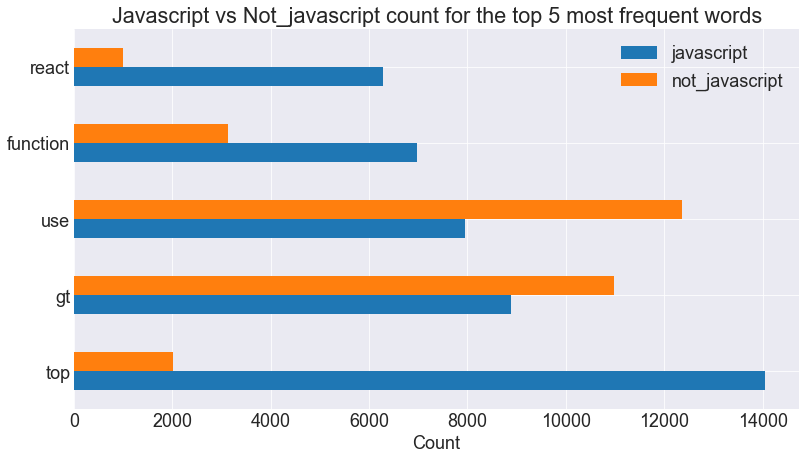

<Figure size 1152x648 with 0 Axes>

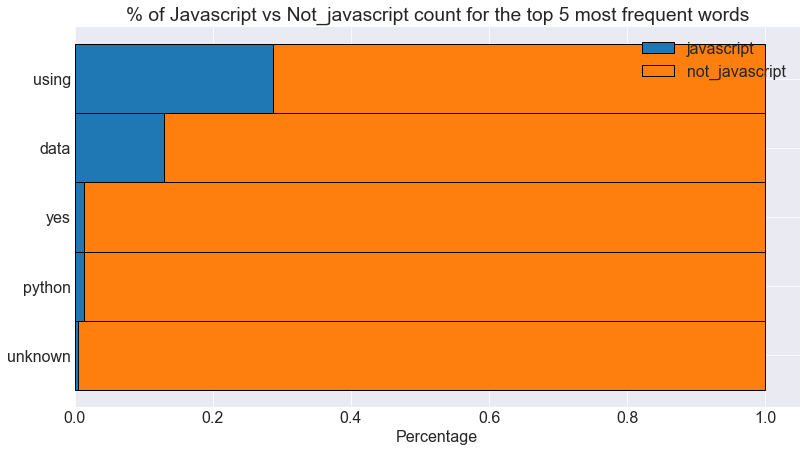

In [6]:
# Looking at just JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)
# Looking at just JavaScript bplot stacked
java_obj.stacked_bplot_freq(n=5, sort=not_lang)

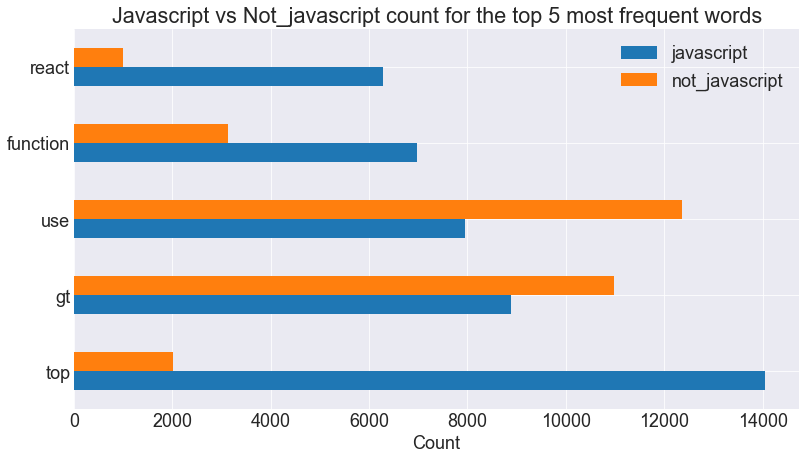

<Figure size 1152x648 with 0 Axes>

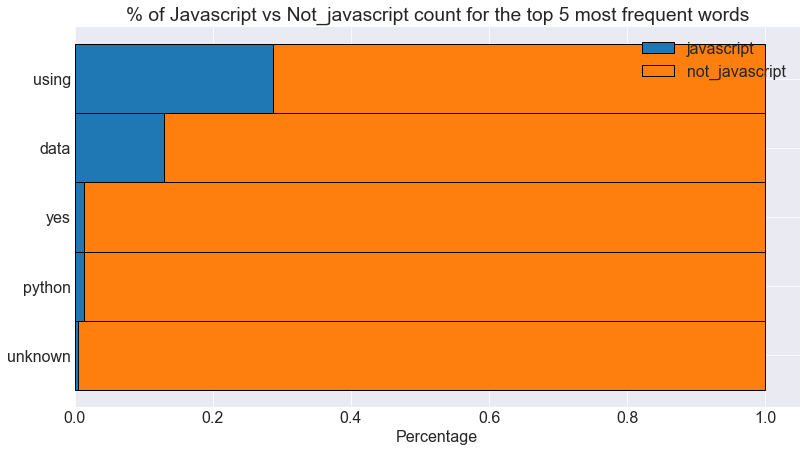

In [7]:
# Looking at just not_JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)
# Looking at just not_JavaScript bplot stacked
java_obj.stacked_bplot_freq(n=5, sort=not_lang)

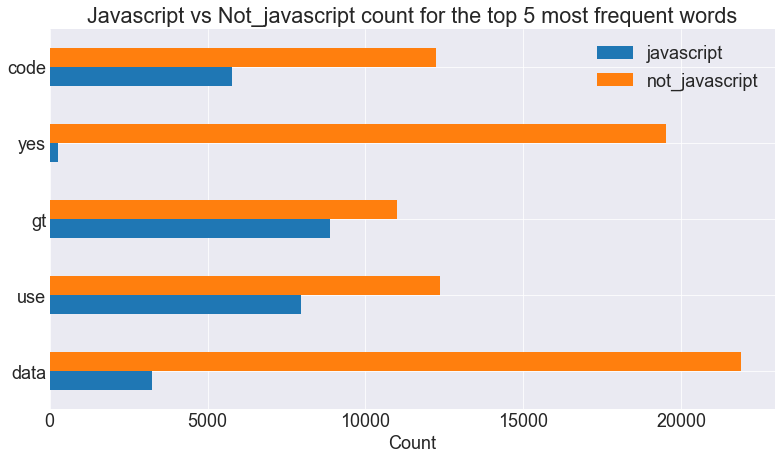

<Figure size 1152x648 with 0 Axes>

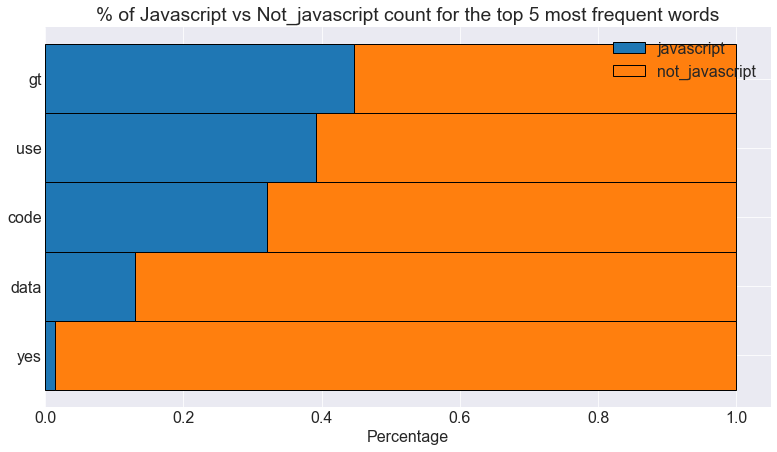

In [8]:
# Looking at just all hplot
java_obj.hplot_word_freq_viz(n=5)
# Looking at just all bplot stacked
java_obj.stacked_bplot_freq(n=5)

## Look at N-Grams Visualizations

### Look at Bigrams

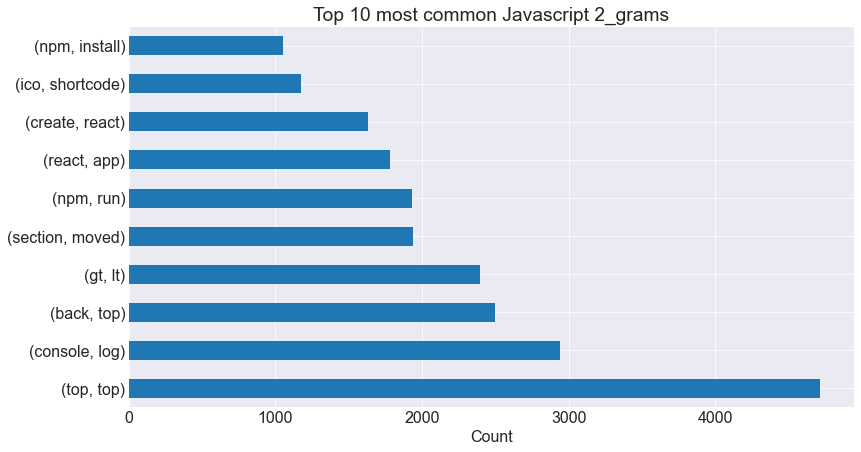

In [9]:
java_bigram = java_obj.n_gram(top_n= 10, col=lang)

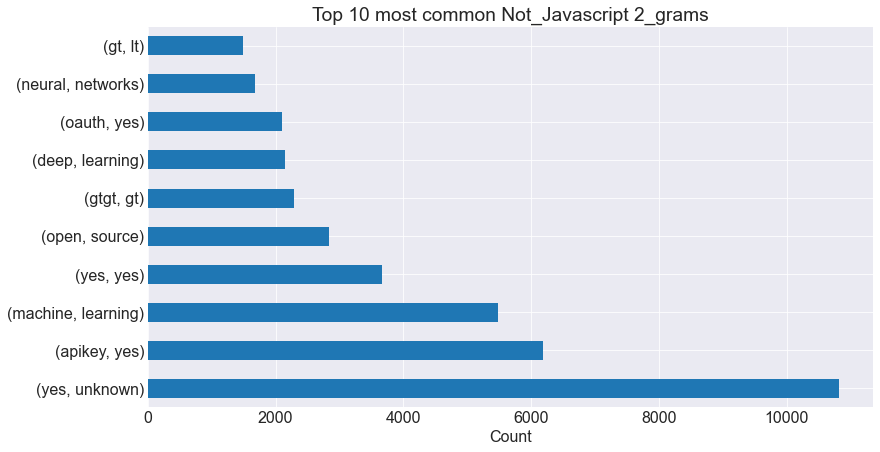

In [10]:
not_java_bigram = java_obj.n_gram(top_n = 10, col=not_lang)

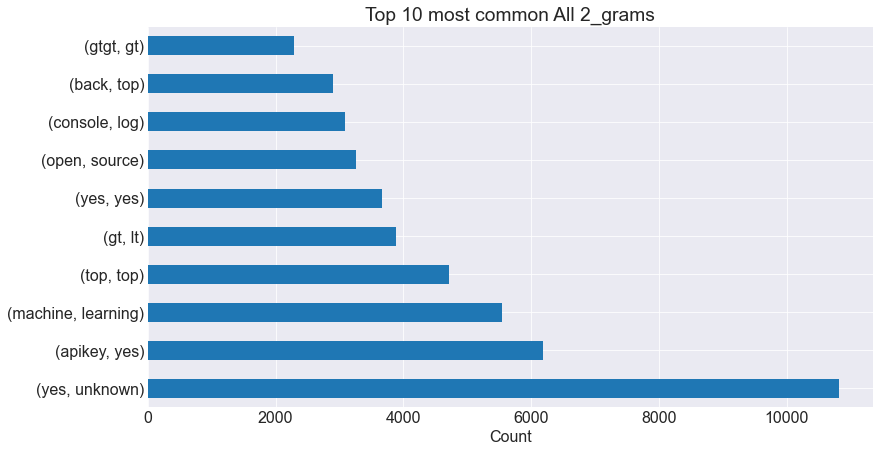

In [11]:
both_bigrams = java_obj.n_gram(top_n=10)

### Look at trigrams

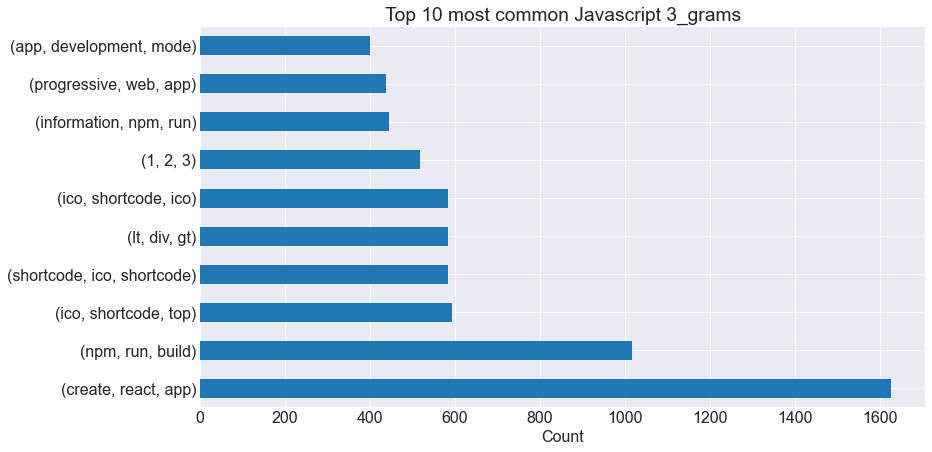

In [12]:
java_trigram = java_obj.n_gram(n=3, top_n=10, col=lang)

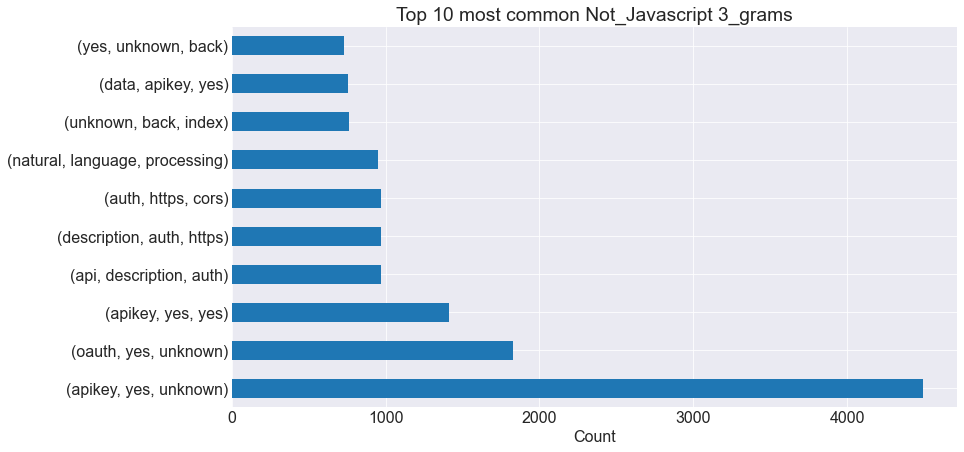

In [13]:
not_java_trigram = java_obj.n_gram(n=3, top_n=10, col=not_lang)

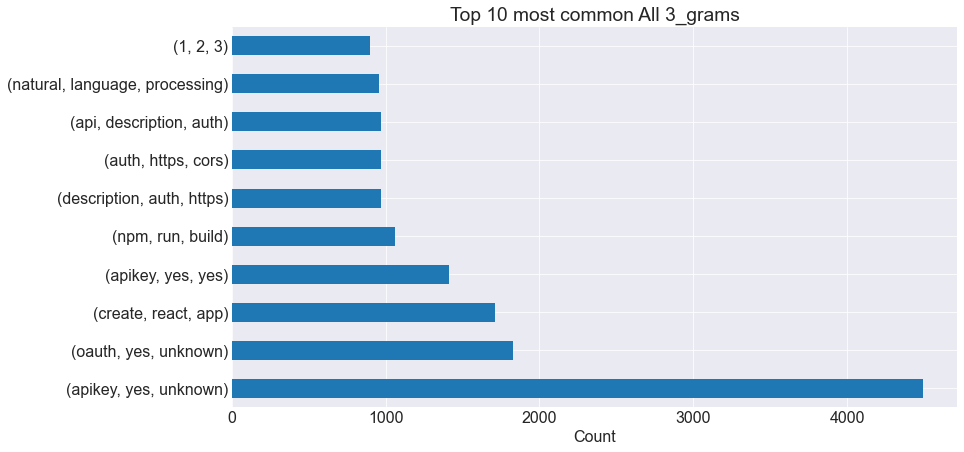

In [14]:
all_trigram = java_obj.n_gram(n=3, top_n=10)

### Plot some wordclouds

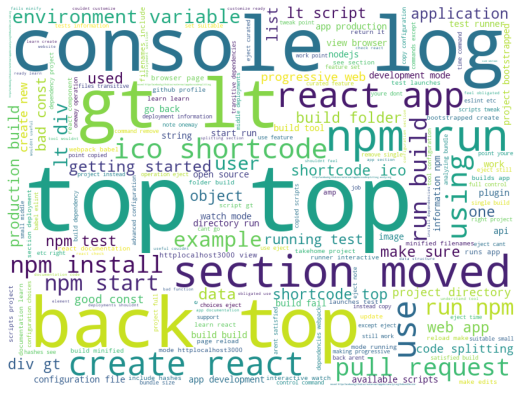

In [15]:
java_obj.plot_wordcloud(col=lang, save=True)

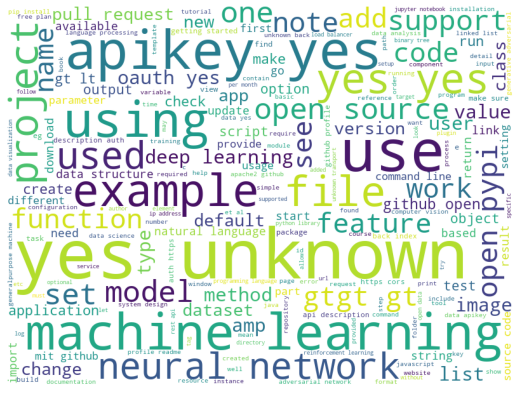

In [16]:
java_obj.plot_wordcloud(col=not_lang, save=True)

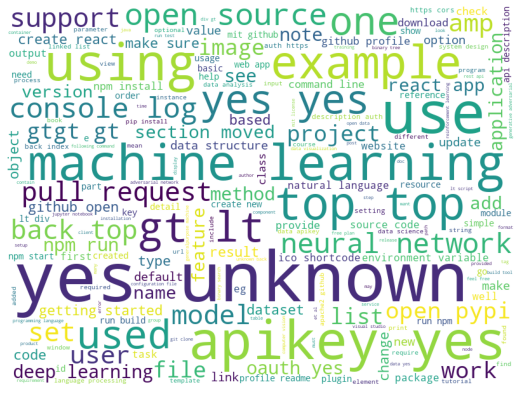

In [17]:
java_obj.plot_wordcloud(save=True)

## Add some sentiment analysis and some features

In [18]:
# Add sentiment analysis
java_obj.add_sentiment_analysis()
# Add features
java_obj.add_features()

java_obj.df.head()

,readme,prog_lang,original,cleaned,stemmed,lemmatized,label,neg,neu,pos,compound,message_length,word_count,unique_word_count,avg_word_len
0,🚧 WIP,JavaScript,🚧 WIP,wip,wip,wip,javascript,0.000,1.000,0.000,0.0000,3,1,{'wip': 1},3.00
1,abhisheknaiidu The CLI Table of Contents Ins...,JavaScript,abhisheknaiidu The CLI Table of Contents Ins...,abhisheknaiidu cli table contents installation...,abhisheknaiidu cli tabl content instal built l...,abhisheknaiidu cli table content installation ...,javascript,0.000,0.855,0.145,0.8658,506,67,"{'cli': 3, 'react': 2, 'built': 2, 'open': 2, ...",7.55
2,Interview Preparation Arrays Sieve Catalan N...,C++,Interview Preparation Arrays Sieve Catalan N...,interview preparation arrays sieve catalan num...,interview prepar array siev catalan number sli...,interview preparation array sieve catalan numb...,not_javascript,0.025,0.893,0.081,0.9911,6020,872,"{'notes': 61, 'day': 29, 'today': 27, 'focus':...",6.90
3,Hacktoberfest 2020 🎉 🗣 Hacktoberfest encour...,JavaScript,Hacktoberfest 2020 🎉 🗣 Hacktoberfest encour...,hacktoberfest 2020 hacktoberfest encourages pa...,hacktoberfest 2020 hacktoberfest encourag part...,hacktoberfest 2020 hacktoberfest encourages pa...,javascript,0.026,0.872,0.102,0.6808,556,68,"{'hacktoberfest': 3, '2020': 2, 'requests': 2,...",8.18
4,A-POP 🎶 A-POP is a HD Music Stream and Shar...,JavaScript,A-POP 🎶 A-POP is a HD Music Stream and Shar...,apop apop hd music stream sharing application ...,apop apop hd music stream share applic built o...,apop apop hd music stream sharing application ...,javascript,0.000,0.893,0.107,0.9325,1066,139,"{'application': 4, 'technology': 3, 'client': ...",7.67


## Sentiment analysis bivariate plots

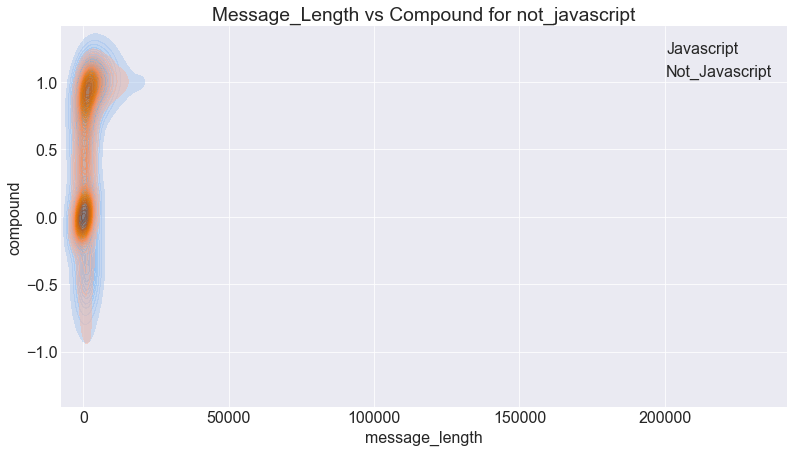

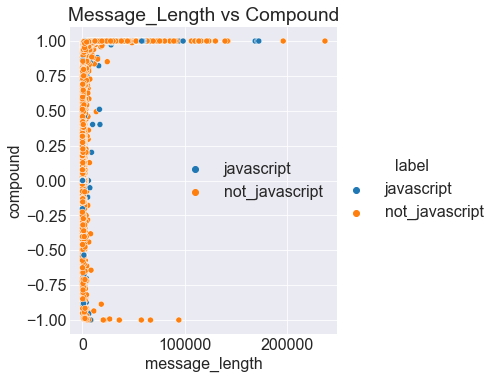

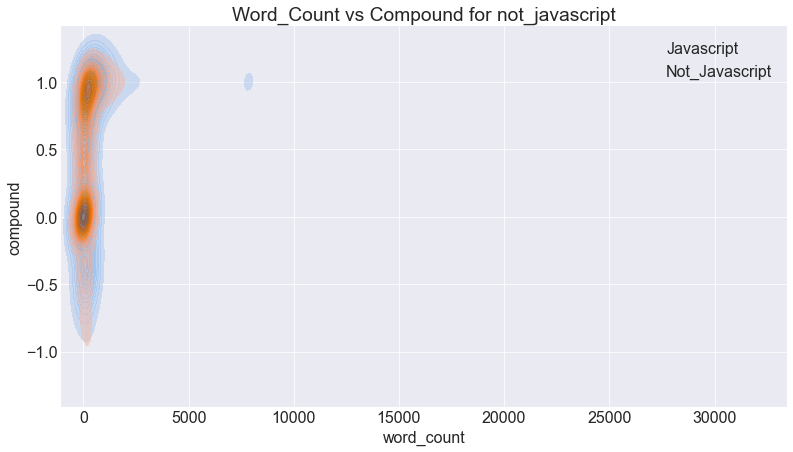

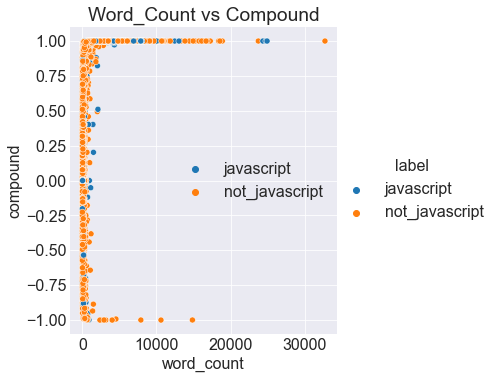

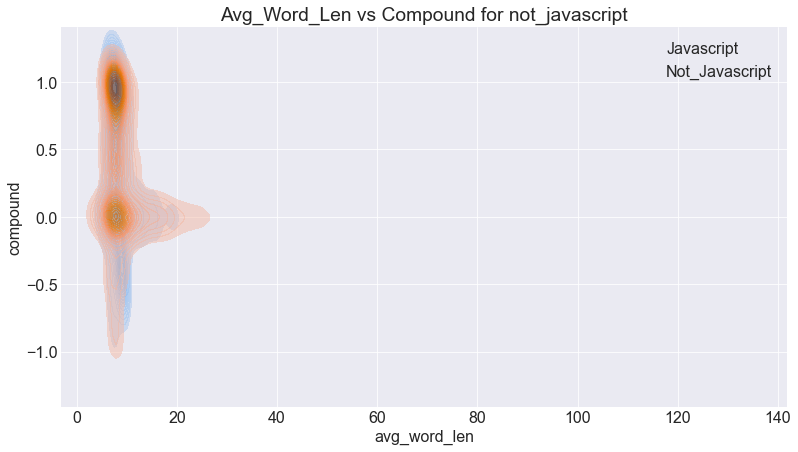

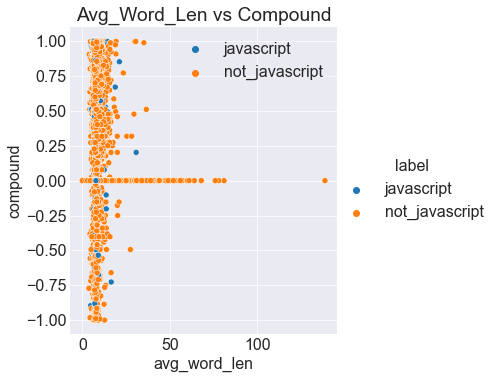

In [19]:
java_obj.sentiment_bivariate_plots()

## Sentiment distribution plots

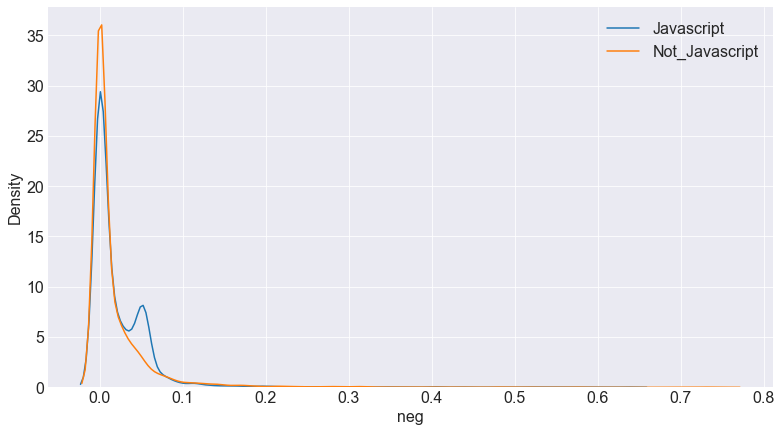

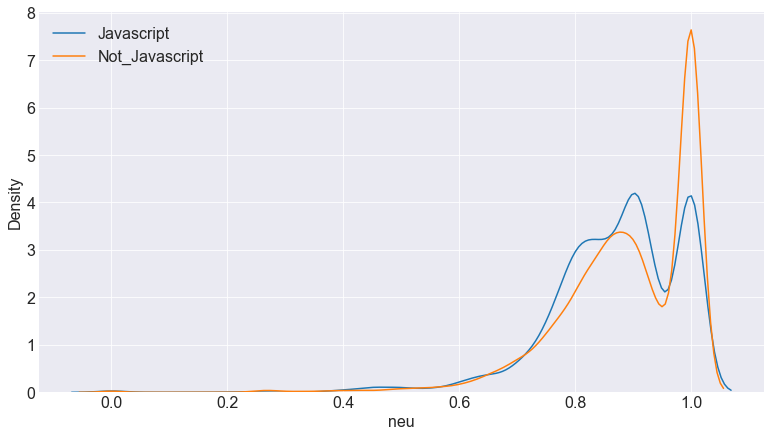

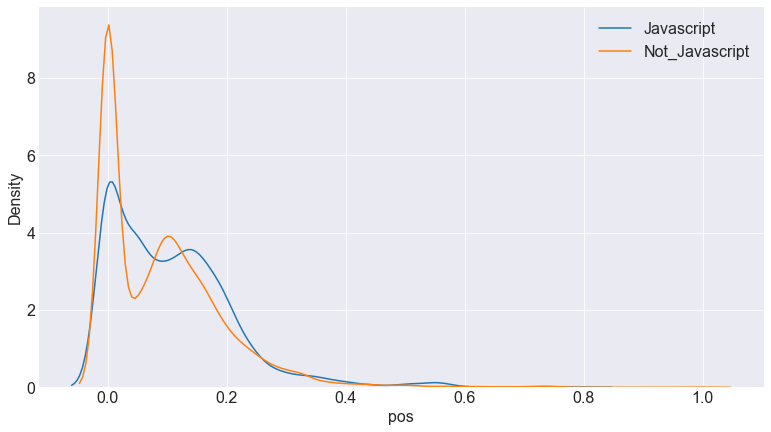

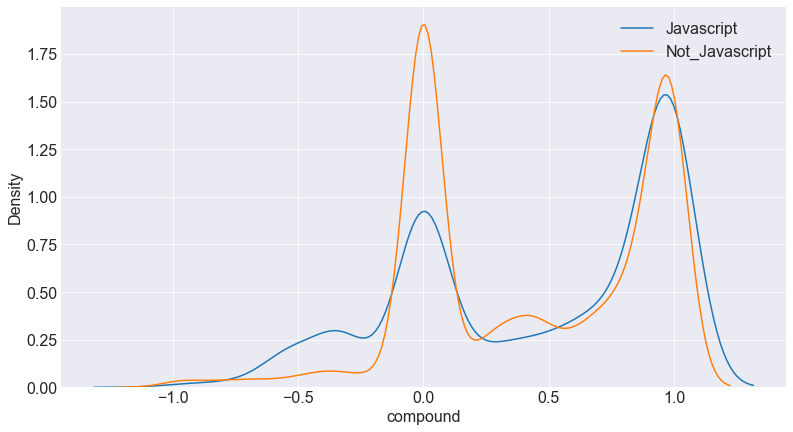

In [20]:
java_obj.sentiment_distributions()

In [21]:
%%html
<style>
table {margin-left: 0 !important;}
</style>